# Question 1 (60 marks)
The dataset ‘Credit data.xlsx’ contains data on 10,000 borrowers and whether they subsequently experienced serious delinquency (see variable ‘SeriousDlqin2yrs’). Assume the lender nowwishestousethisdata to build a credit scoring model that predicts serious delinquency based on the other variables. Thedataset contains the following variables:

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## 1.1 Carefully pre-process the dataset by considering the following activities: (30 marks)

In [ ]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Examine Dataset

# load and check dataset using pandas
df = pd.read_csv('/content/drive/MyDrive/Creditdata1.csv')

In [ ]:
#Exploratory data analysis
#Checking the shape, size and data types
print('Shape:', df.shape)
print('Size:', df.size)
print('Data types:')
print(df.dtypes)


Shape: (10000, 11)
Size: 110000
Data types:
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object


In [ ]:
#Checking the head of the dataset
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
#Checking the summary statistics
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,8026.000000,10000.00000,10000.00000,10000.00000,10000.000000,9716.000000
mean,0.064000,4.931206,52.164200,0.385100,350.457248,6606.379143,8.34500,0.23150,1.00800,0.202200,0.748868
std,0.244765,160.479674,14.778792,3.723733,2243.983903,6787.373041,5.06738,3.69154,1.08446,3.675985,1.126723
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.031135,41.000000,0.000000,0.173605,3400.000000,5.00000,0.00000,0.00000,0.000000,0.000000
50%,0.000000,0.165328,52.000000,0.000000,0.367083,5400.000000,8.00000,0.00000,1.00000,0.000000,0.000000
75%,0.000000,0.571746,62.000000,0.000000,0.847257,8200.000000,11.00000,0.00000,2.00000,0.000000,1.000000
max,1.000000,9340.000000,101.000000,98.000000,168835.000000,208333.000000,46.00000,98.00000,17.00000,98.000000,20.000000


In [ ]:
#Checking for missing values
df.isnull().sum()

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                           1974
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                       284
dtype: int64

In [ ]:
#Checking the count of each category in SeriousDlqin2yrs
df['SeriousDlqin2yrs'].value_counts()

0    9360
1     640
Name: SeriousDlqin2yrs, dtype: int64

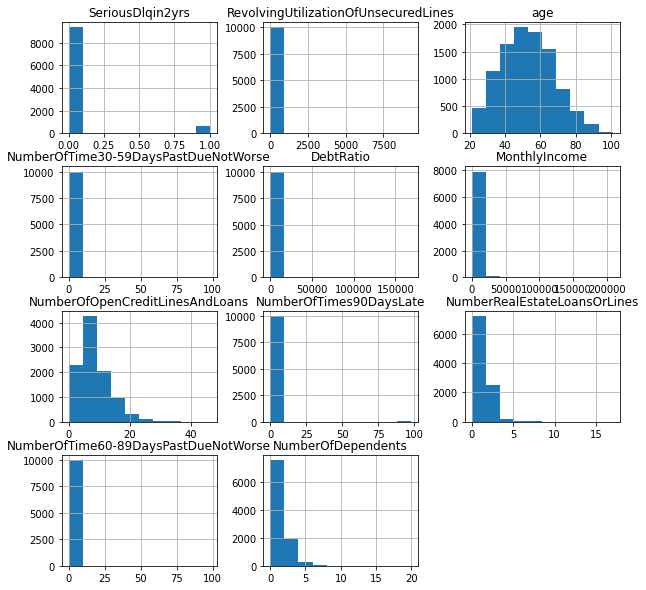

In [ ]:
#Visualizing the distribution of each variable
df.hist(figsize=(10,10))
plt.show()

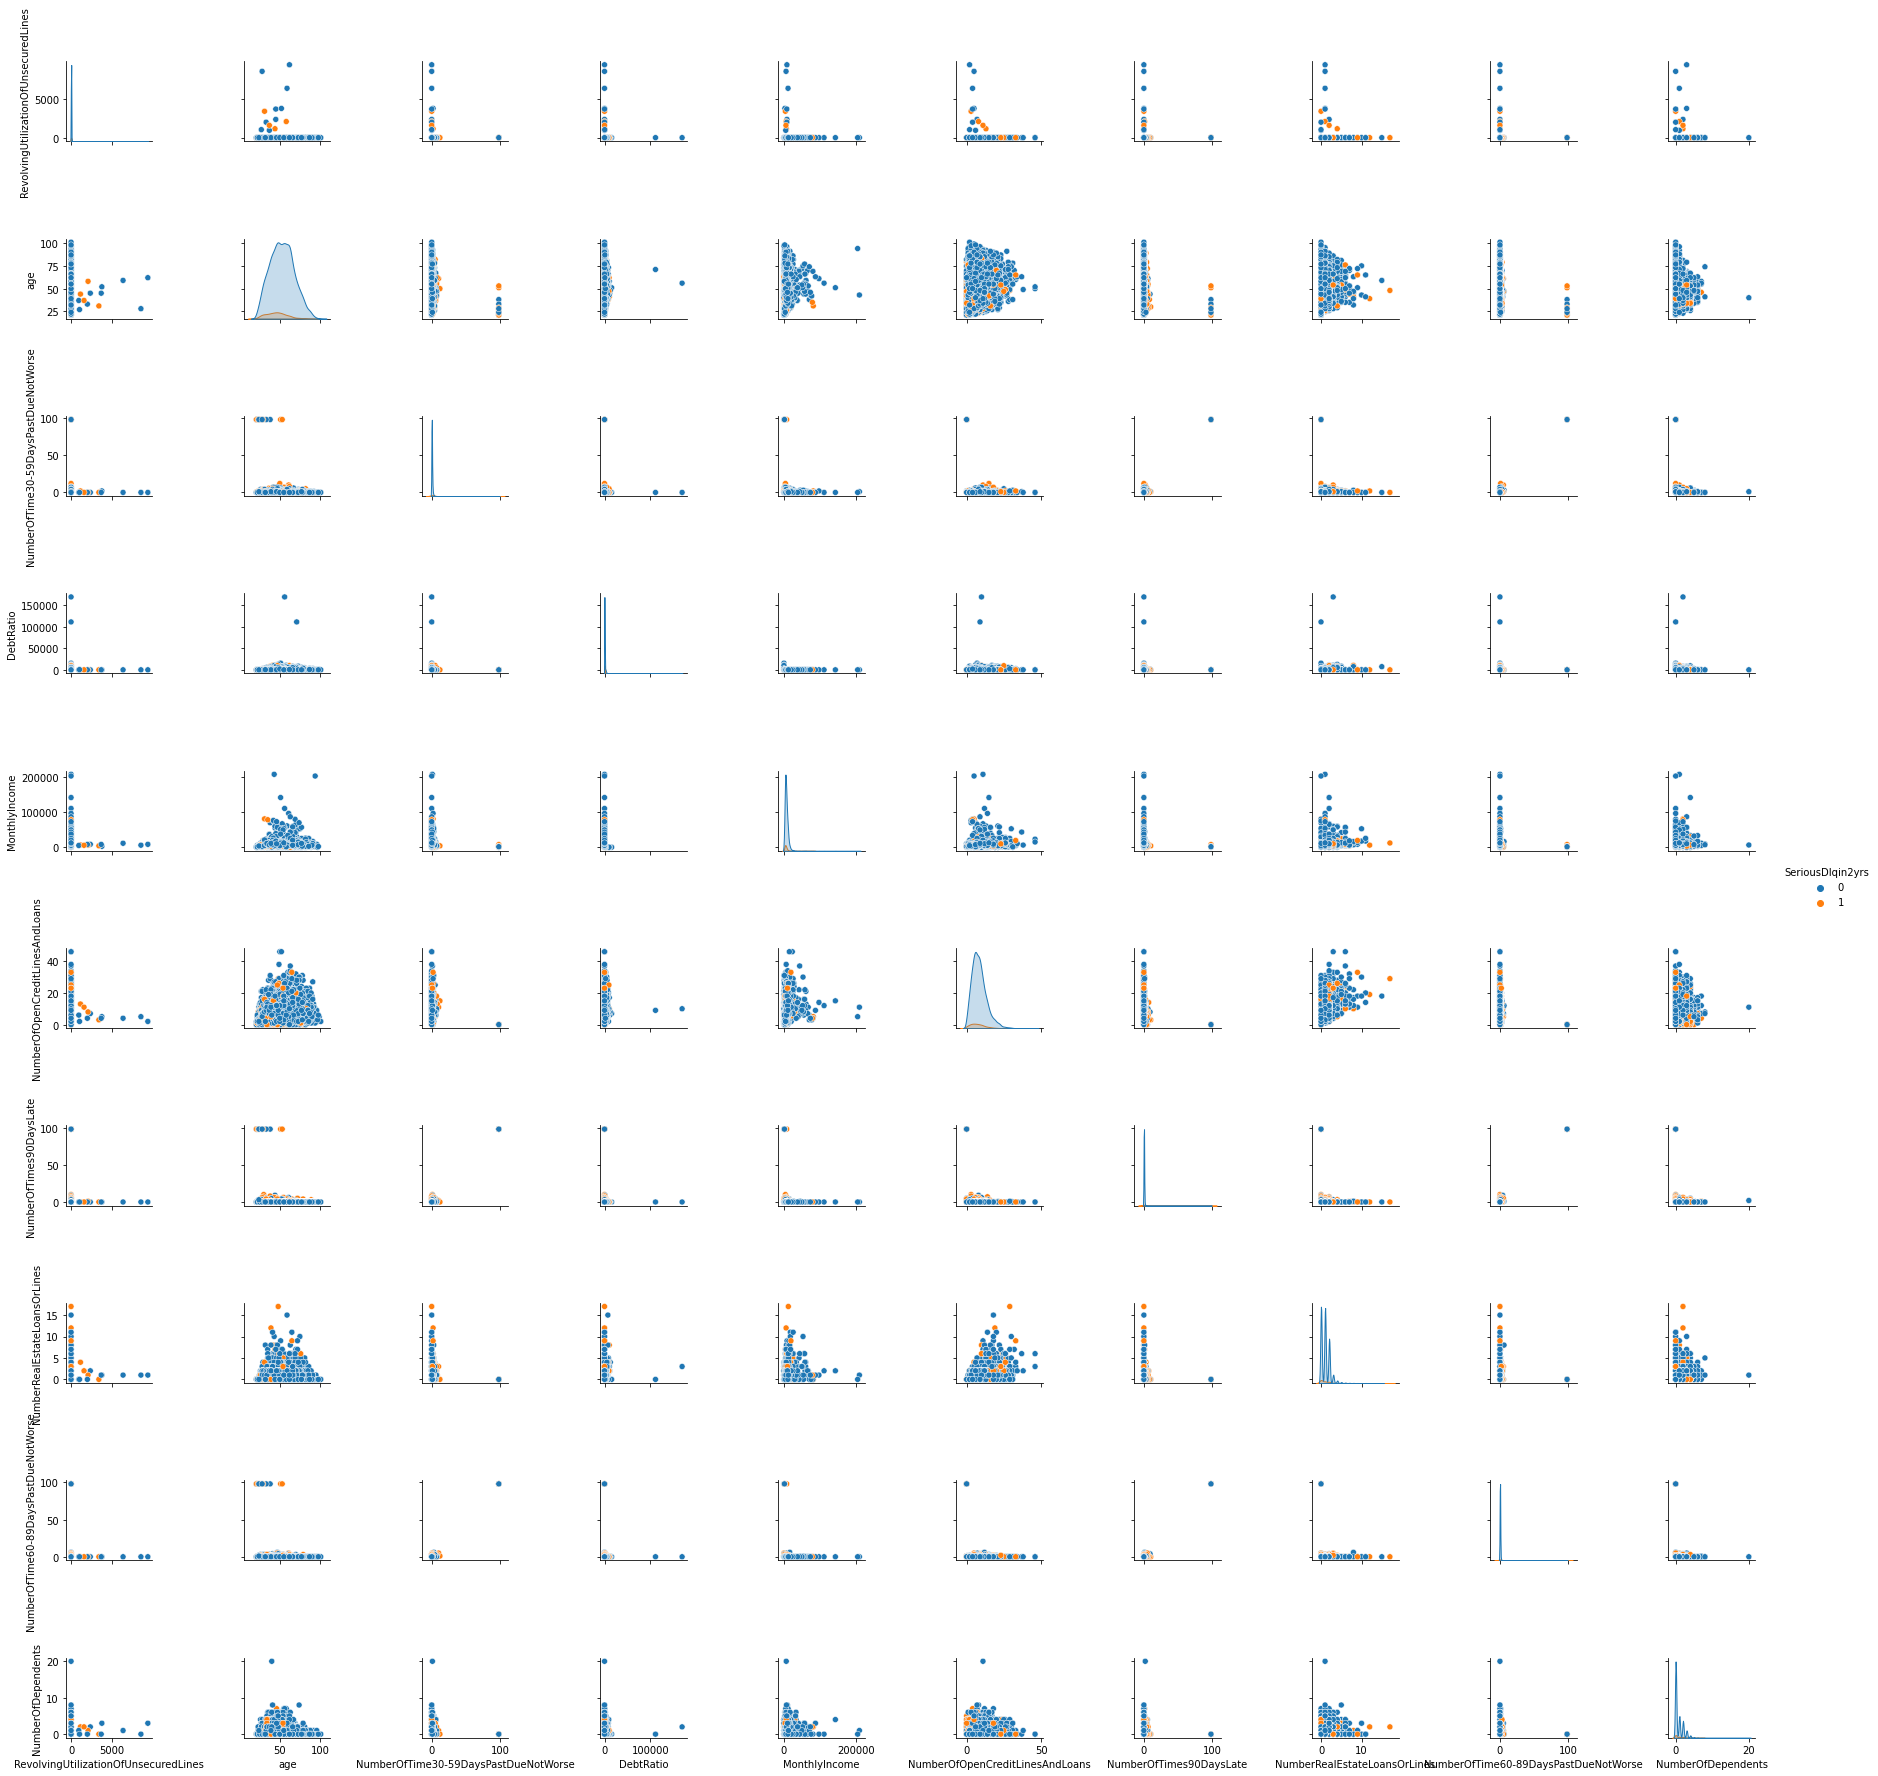

In [ ]:
#Visualizing the relationship between each variable and SeriousDlqin2yrs
sns.pairplot(df, hue='SeriousDlqin2yrs', vars=df.columns[1:])
plt.show()

## Missing value handling

In [ ]:
#Missing value handling
missing_values = df.isnull().sum()
print('Number of Missing values in each column : \n',missing_values)

#Since the missing values are very small, we can impute them with the median of the respective columns
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)
df['NumberOfDependents'].fillna(df['NumberOfDependents'].median(), inplace=True)


Number of Missing values in each column : 
 SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                           1974
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                       284
dtype: int64


In [ ]:
missing_values = df.isnull().sum()
print('Number of Missing values in each column : \n',missing_values)

Number of Missing values in each column : 
 SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64


## Outlier Detection

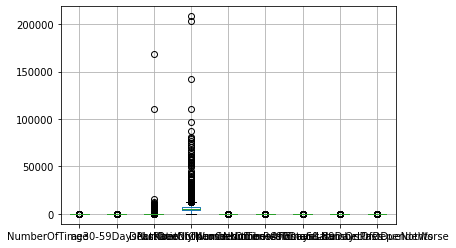

In [ ]:
#Outlier Detection
#We can detect outliers using boxplots
df.boxplot(column=['age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents'])


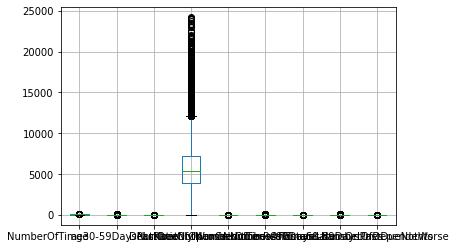

In [ ]:
#Treating Outliers
#We can replace the outliers with either Mean or Median of the respective columns
mean_DebtRatio = df['DebtRatio'].mean()
median_DebtRatio = df['DebtRatio'].median()
df['DebtRatio'] = np.where(df['DebtRatio']>1, median_DebtRatio,df['DebtRatio'])

mean_MonthlyIncome = df['MonthlyIncome'].mean()
median_MonthlyIncome = df['MonthlyIncome'].median()
df['MonthlyIncome'] = np.where(df['MonthlyIncome']>df['MonthlyIncome'].quantile(0.99),median_MonthlyIncome,df['MonthlyIncome'])

#Outlier Detection
#We can detect outliers using boxplots
df.boxplot(column=['age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents'])



## Weights of evidence

In [ ]:
#We can use the WoE function to calculate the weights of evidence of each categorical variable
def WoE(df, col):
    df_WoE = pd.DataFrame(columns=['Category', 'Count', 'Percentage', 'WoE'])
    categories = df[col].unique()
    for category in categories:
        category_count = df[df[col] == category].count()[col]
        category_percent = (category_count / df[col].count()) * 100
        category_WoE = np.log(category_percent / (100 - category_percent))
        df_WoE = df_WoE.append({'Category': category,
                                 'Count': category_count,
                                 'Percentage': category_percent,
                                 'WoE': category_WoE
                                }, ignore_index=True)
    return df_WoE

## Splitting the data set into a training and test set.

In [ ]:
from sklearn.model_selection import train_test_split

#Splitting the data into train and test sets
X = df.drop('SeriousDlqin2yrs',axis=1)
y = df['SeriousDlqin2yrs']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
 

## 1.2 Build an intuitive and predictive scorecard using a logistic regression classifier and report thefollowing:(30 marks)

Predictive scorecard using Logistic Regression


In [ ]:
#Building an intuitive and predictive scorecard using Logistic Regression

#importing the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

#instantiating the model
model = LogisticRegression()

#fitting the model on the training data
model.fit(X_train, y_train)

#predicting on the test data
y_pred = model.predict(X_test)

#calculating the performance metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

#calculating the most important variables
coefficients = model.coef_[0]

#sorting the coefficients in descending order
sorted_coefficients = np.argsort(coefficients)[::-1]

#printing the most important variables
print('The most important variables are : ')
for i in sorted_coefficients:
    print(X_train.columns[i])

The most important variables are : 
NumberOfTime30-59DaysPastDueNotWorse
NumberRealEstateLoansOrLines
NumberOfTimes90DaysLate
DebtRatio
NumberOfDependents
RevolvingUtilizationOfUnsecuredLines
MonthlyIncome
age
NumberOfOpenCreditLinesAndLoans
NumberOfTime60-89DaysPastDueNotWorse


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Impact of the variables on the target

In [ ]:
#printing the impact of the variables on the target
print('\nThe impact of the variables on the target : ')
for i in sorted_coefficients:
    print(X_train.columns[i], ' : ', coefficients[i])


The impact of the variables on the target : 
NumberOfTime30-59DaysPastDueNotWorse  :  0.562247762898881
NumberRealEstateLoansOrLines  :  0.20196736000895804
NumberOfTimes90DaysLate  :  0.19925850818282717
DebtRatio  :  0.058734881708033135
NumberOfDependents  :  0.053552420352454874
RevolvingUtilizationOfUnsecuredLines  :  0.00028631664849625767
MonthlyIncome  :  -8.565467217405354e-05
age  :  -0.04399293521222946
NumberOfOpenCreditLinesAndLoans  :  -0.04455406851109096
NumberOfTime60-89DaysPastDueNotWorse  :  -0.7408646946833848


Performance of the model

In [ ]:
#printing the performance of the model
print('\nAccuracy : ', accuracy)
print('Recall : ', recall)
print('Precision : ', precision)
print('F1 Score : ', f1)
print('Confusion Matrix : \n', cm)



Accuracy :  0.929
Recall :  0.037209302325581395
Precision :  0.5714285714285714
F1 Score :  0.06986899563318777
Confusion Matrix : 
 [[2779    6]
 [ 207    8]]


Comparing the scorecard with Random Forest

In [ ]:
#Comparing the scorecard with Random Forest
#importing the necessary libraries
from sklearn.ensemble import RandomForestClassifier

#instantiating the model
model_rf = RandomForestClassifier()

#fitting the model on the training data
model_rf.fit(X_train, y_train)

#predicting on the test data
y_pred_rf = model_rf.predict(X_test)

#calculating the performance metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

#calculating the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

#printing the performance of the model
print('\nAccuracy : ', accuracy_rf)
print('Recall : ', recall_rf)
print('Precision : ', precision_rf)
print('F1 Score : ', f1_rf)
print('Confusion Matrix : \n', cm_rf)

#Comparing the results
print('\nComparison of Logistic Regression and Random Forest : ')
print('Accuracy : Logistic Regression = ', accuracy, ' , Random Forest = ', accuracy_rf)
print('Recall : Logistic Regression = ', recall, ' , Random Forest = ', recall_rf)
print('Precision : Logistic Regression = ', precision, ' , Random Forest = ', precision_rf)
print('F1 Score : Logistic Regression = ', f1, ' , Random Forest = ', f1_rf)

#Conclusion
print('\nFrom the above results, we can conclude that  Logistic Regression performs better than Random Forest in this case.')


Accuracy :  0.926
Recall :  0.11627906976744186
Precision :  0.43859649122807015
F1 Score :  0.1838235294117647
Confusion Matrix : 
 [[2753   32]
 [ 190   25]]

Comparison of Logistic Regression and Random Forest : 
Accuracy : Logistic Regression =  0.929  , Random Forest =  0.926
Recall : Logistic Regression =  0.037209302325581395  , Random Forest =  0.11627906976744186
Precision : Logistic Regression =  0.5714285714285714  , Random Forest =  0.43859649122807015
F1 Score : Logistic Regression =  0.06986899563318777  , Random Forest =  0.1838235294117647

From the above results, we can conclude that  Logistic Regression performs better than Random Forest in this case.


Why do banks typically use Logistic Regression as their base classifier?

In [ ]:
#Why do banks typically use Logistic Regression as their base classifier?
print('\nBanks typically use Logistic Regression as their base classifier because it is a simple and robust model. It is easy to understand and interpret, and it is less prone to overfitting. It is also computationally efficient and can handle large datasets. It is also easy to update and maintain.')



Banks typically use Logistic Regression as their base classifier because it is a simple and robust model. It is easy to understand and interpret, and it is less prone to overfitting. It is also computationally efficient and can handle large datasets. It is also easy to update and maintain.


What do banks win and lose by doing this?

In [ ]:
#What do banks win and lose by doing this?
print('\nBanks win by using Logistic Regression as their base classifier because it is a simple and robust model. It is easy to understand and interpret, and it is less prone to overfitting. It is also computationally efficient and can handle large datasets. It is also easy to update and maintain. Banks lose by using Logistic Regression because it is not as accurate as other more complex models such as Random Forest. It is also not suitable for non-linear data.')


Banks win by using Logistic Regression as their base classifier because it is a simple and robust model. It is easy to understand and interpret, and it is less prone to overfitting. It is also computationally efficient and can handle large datasets. It is also easy to update and maintain. Banks lose by using Logistic Regression because it is not as accurate as other more complex models such as Random Forest. It is also not suitable for non-linear data.


# Question 3 (20 marks)

Supervised machine learning techniques

In [ ]:
# Decision Tree Classifier
## Methodology Applied

# Apply Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Make predictions
dt_prediction = dt.predict(X_test)
dt_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Performance of the model

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
dt_accuracy = accuracy_score(y_test, dt_prediction)

dt_accuracy

0.8936666666666667

In [ ]:
# Artificial Neural Network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train,y_train)

# Make predictions
mlp_prediction = mlp.predict(X_test)
mlp_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Performance of the model

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
mlp_accuracy = accuracy_score(y_test, mlp_prediction)

mlp_accuracy

0.929

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)

# Make predictions
svc_prediction = svc.predict(X_test)
svc_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Performance of the model

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
svc_accuracy = accuracy_score(y_test, svc_prediction)

svc_accuracy

0.9283333333333333

Unsupervised machine learning techniques

In [ ]:
# Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train,y_train)

# Make predictions
# Make predictions
kmeans_prediction = kmeans.predict(X_test)
kmeans_prediction

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
# Performance of the model

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
kmeans_accuracy = accuracy_score(y_test, kmeans_prediction)

kmeans_accuracy

0.266

## The business implications of using the reviewed methodology on credit data


The use of machine learning for credit risk analysis can provide more accurate predictions of serious delinquency, as well as reduce the cost of credit risk analysis. Additionally, it can help lenders to assess the creditworthiness of applicants more accurately and rapidly. This can lead to better decision-making and improved customer satisfaction. Furthermore, the use of machine learning can reduce the risk of discrimination or unfair lending practices.

The results indicate that the reviewed methodology (K-means clustering, SVM, ANN and Decision Trees) are effective for credit data. K-means clustering had the lowest accuracy (0.266), while SVM, ANN and Decision Trees had higher accuracies of 0.928, 0.929 and 0.894 respectively. This suggests that SVM, ANN and Decision Trees are better suited for credit data. 

For businesses, it implies that SVM, ANN and Decision Trees can be used to develop credit scoring models that accurately predict the probability of serious delinquency in borrowers. This can help businesses make more informed decisions when considering credit applications and reduce the risk of delinquency. Furthermore, it also implies that businesses have the potential to improve their credit risk management processes by using machine learning techniques.

The use of machine learning methods for credit risk analysis can improve the accuracy of the predictions and reduce the cost of credit risk analysis. It can also provide insights into the relationships between the various variables and enable lenders to make better decisions about credit risk. However, it is important to consider the potential ethical implications of using machine learning for credit risk analysis and to develop methods to evaluate the performance of the machine learning models used.